In [37]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import skew
from scipy.stats import zscore
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
df['z-score'] = (df['total_bill']-df['total_bill'].mean())/df['total_bill'].std()
df['z-score']

0     -0.314066
1     -1.061054
2      0.137497
3      0.437416
4      0.539635
5      0.618266
6     -1.237411
7      0.796869
8     -0.533108
9     -0.562313
10    -1.068917
11     1.738187
12    -0.490422
13    -0.152312
14    -0.556697
15     0.201525
16    -1.062178
17    -0.392696
18    -0.316312
19     0.097059
20    -0.209600
21     0.056620
22    -0.451107
23     2.205476
24     0.003826
25    -0.221956
26    -0.720697
27    -0.797081
28     0.215004
29    -0.015270
         ...   
214    0.941774
215   -0.773492
216    0.939527
217   -0.920643
218   -1.353110
219    1.163062
220   -0.856615
221   -0.715081
222   -1.258754
223   -0.427518
224   -0.715081
225   -0.394943
226   -1.089137
227    0.074593
228   -0.730807
229    0.262183
230    0.474485
231   -0.460094
232   -0.918396
233   -1.012753
234   -0.478066
235   -1.091383
236   -0.807191
237    1.465227
238    1.802215
239    1.038377
240    0.830568
241    0.323964
242   -0.220833
243   -0.112997
Name: z-score, Length: 2

In [39]:
((df['z-score']>3) | (df['z-score']<-3)).sum()


4

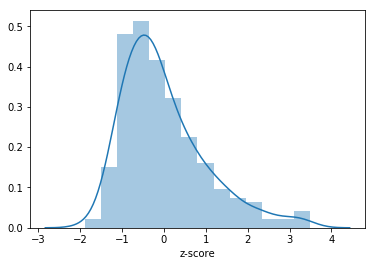

In [40]:
sns.distplot(df['z-score'])


In [41]:
df[((df['z-score']>-3)|(df['z-score']<3))].max()

total_bill     50.81
tip               10
sex             Male
smoker           Yes
day             Thur
time           Lunch
size               6
z-score       3.4849
dtype: object

In [42]:
df[((df['z-score']>-3)&(df['z-score']<3))].count()

total_bill    240
tip           240
sex           240
smoker        240
day           240
time          240
size          240
z-score       240
dtype: int64

In [46]:
df[((df['z-score']>-3)&(df['z-score']<3))].max()

total_bill      45.35
tip              7.58
sex              Male
smoker            Yes
day              Thur
time            Lunch
size                6
z-score       2.87159
dtype: object

In [44]:
df[((df['z-score']>-3)&(df['z-score']<3))].skew()

total_bill    0.914851
tip           0.911693
size          1.454604
z-score       0.914851
dtype: float64

### Emperical Rule

* holds true for only bell shaped curve

* 68% of data lies with in one std deviation in a perfect bell shaped curve

* 95% of data lies with in two std deviation in a perfect bell shaped curve 

* 99.70% of data lies with in three std deviation in a perfect bell shaped curve 


### IQR Method

UL = Q3 + 1.5IQR

LL = Q1 - 1.5IQR

In [9]:
Q3=df.quantile(0.75)
Q3

total_bill    24.127500
tip            3.562500
size           3.000000
z-score        0.487683
Name: 0.75, dtype: float64

In [10]:
Q1=df.quantile(0.25)
Q1

total_bill    13.347500
tip            2.000000
size           2.000000
z-score       -0.723225
Name: 0.25, dtype: float64

In [11]:
IQR = Q3-Q1
IQR

total_bill    10.780000
tip            1.562500
size           1.000000
z-score        1.210908
dtype: float64

In [12]:
UL = Q3+1.5*IQR
UL

total_bill    40.297500
tip            5.906250
size           4.500000
z-score        2.304045
dtype: float64

In [13]:
LL = Q1-1.5*IQR
LL

total_bill   -2.822500
tip          -0.343750
size          0.500000
z-score      -2.539586
dtype: float64

In [14]:
q3=df['total_bill'].quantile(0.75)
q3


24.127499999999998

In [15]:
q2=df['total_bill'].quantile(0.5)
q2


17.795

In [16]:
q1=df['total_bill'].quantile(0.25)
q1

13.3475

In [17]:
IQR=q3-q1
IQR

10.779999999999998

In [18]:
ul = q3+1.5*IQR
ul

40.29749999999999

In [19]:
ll = q1-1.5*IQR
ll

-2.8224999999999945

In [20]:
((df['total_bill']>ll) & (df['total_bill']<ul)).sum()

235

In [21]:
df[(df['total_bill']>ll) & (df['total_bill']<ul)].head()


,total_bill,tip,sex,smoker,day,time,size,z-score
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314066
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.061054
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137497
3,23.68,3.31,Male,No,Sun,Dinner,2,0.437416
4,24.59,3.61,Female,No,Sun,Dinner,4,0.539635


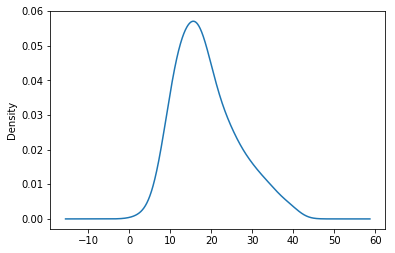

In [22]:
df[(df['total_bill']>ll) & (df['total_bill']<ul)]['total_bill'].plot(kind='kde')

### Dealing with categorical data

##### one hot encoding 

* converting categorical to numerical

In [23]:
df['sex']=df['sex'].replace({'Male':0,'Female':1})

In [24]:
df.head(7)

,total_bill,tip,sex,smoker,day,time,size,z-score
0,16.99,1.01,1,No,Sun,Dinner,2,-0.314066
1,10.34,1.66,0,No,Sun,Dinner,3,-1.061054
2,21.01,3.50,0,No,Sun,Dinner,3,0.137497
3,23.68,3.31,0,No,Sun,Dinner,2,0.437416
4,24.59,3.61,1,No,Sun,Dinner,4,0.539635
5,25.29,4.71,0,No,Sun,Dinner,4,0.618266
6,8.77,2.00,0,No,Sun,Dinner,2,-1.237411


In [25]:
pd.get_dummies(df['day']).head()

,Thur,Fri,Sat,Sun
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [26]:
pd.get_dummies(df['day'],drop_first=True).head()

,Fri,Sat,Sun
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [27]:
pd.get_dummies(df,columns=['sex','time']).head()

,total_bill,tip,smoker,day,size,z-score,sex_0,sex_1,time_Lunch,time_Dinner
0,16.99,1.01,No,Sun,2,-0.314066,0,1,0,1
1,10.34,1.66,No,Sun,3,-1.061054,1,0,0,1
2,21.01,3.50,No,Sun,3,0.137497,1,0,0,1
3,23.68,3.31,No,Sun,2,0.437416,1,0,0,1
4,24.59,3.61,No,Sun,4,0.539635,0,1,0,1


In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
minmax=MinMaxScaler()
minmax

MinMaxScaler(copy=True, feature_range=(0, 1))

In [30]:
df['mm'] = minmax.fit_transform(df[['total_bill']])
df

,total_bill,tip,sex,smoker,day,time,size,z-score,mm
0,16.99,1.01,1,No,Sun,Dinner,2,-0.314066,0.291579
1,10.34,1.66,0,No,Sun,Dinner,3,-1.061054,0.152283
2,21.01,3.50,0,No,Sun,Dinner,3,0.137497,0.375786
3,23.68,3.31,0,No,Sun,Dinner,2,0.437416,0.431713
4,24.59,3.61,1,No,Sun,Dinner,4,0.539635,0.450775
5,25.29,4.71,0,No,Sun,Dinner,4,0.618266,0.465438
6,8.77,2.00,0,No,Sun,Dinner,2,-1.237411,0.119397
7,26.88,3.12,0,No,Sun,Dinner,4,0.796869,0.498743
8,15.04,1.96,0,No,Sun,Dinner,2,-0.533108,0.250733
9,14.78,3.23,0,No,Sun,Dinner,2,-0.562313,0.245287


In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
LE = LabelEncoder()
LE

LabelEncoder()

In [33]:
df['LE_smoker'] = LE.fit_transform(df['smoker'])
df

,total_bill,tip,sex,smoker,day,time,size,z-score,mm,LE_smoker
0,16.99,1.01,1,No,Sun,Dinner,2,-0.314066,0.291579,0
1,10.34,1.66,0,No,Sun,Dinner,3,-1.061054,0.152283,0
2,21.01,3.50,0,No,Sun,Dinner,3,0.137497,0.375786,0
3,23.68,3.31,0,No,Sun,Dinner,2,0.437416,0.431713,0
4,24.59,3.61,1,No,Sun,Dinner,4,0.539635,0.450775,0
5,25.29,4.71,0,No,Sun,Dinner,4,0.618266,0.465438,0
6,8.77,2.00,0,No,Sun,Dinner,2,-1.237411,0.119397,0
7,26.88,3.12,0,No,Sun,Dinner,4,0.796869,0.498743,0
8,15.04,1.96,0,No,Sun,Dinner,2,-0.533108,0.250733,0
9,14.78,3.23,0,No,Sun,Dinner,2,-0.562313,0.245287,0


In [34]:
df.ix[0,0]

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


16.99